# column description

segment_id → Unique ID for each road/catchment segment.

city_name → City where the segment is located.

admin_ward → Administrative ward/sector of the city.

latitude, longitude → Geographic coordinates of the segment.

catchment_id → ID for the catchment area (drainage basin).

elevation_m → Elevation above sea level (in meters).

dem_source → Source of elevation data (e.g., Copernicus, SRTM).

land_use → Type of land use (Residential, Industrial, Institutional, etc.).

soil_group → Soil classification (A, B, C, D) affecting infiltration.

drainage_density_km_per_km2 → Drainage network density in the area.

storm_drain_proximity_m → Distance to the nearest storm drain (meters).

storm_drain_type → Type of drainage (Open Channel, Curb Inlet, Manhole, etc.).

rainfall_source → Source of rainfall data (ERA5, IMD, etc.).

historical_rainfall_intensity_mm_hr → Past rainfall intensity (mm/hr).

return_period_years → Flood return period (5, 10, 25, 50 years).

risk_labels → Flood risk status (e.g., monitor, ponding_hotspot, low_lying, with event date).

# Analysis

1. ----------------------------------------------------Dataset Basics-------------------------------------------------

How many total records are there in the dataset?

What are the different risk_labels?

How many segments fall under each risk label?

2. -------------------------------------------------Geography & Environment----------------------------------------------

Do low elevation areas have more flood risk than high elevation areas?

Which soil type (A–D) is most common in risky areas?

Which land use type (Residential, Industrial, Institutional) shows the highest flood risk?

3. ------------------------------------------------Infrastructure------------------------------------------------

Are places closer to drains safer compared to those far away?

Which drain type (Open Channel, Manhole, Curb Inlet) is seen more in risky areas?

4. ------------------------------------------------Rainfall------------------------------------------------

Do areas with higher rainfall intensity face more flooding?

Does flood risk increase with longer return periods (5 vs 25 vs 50 years)?

5. ------------------------------------------------Location Insights------------------------------------------------

Which city has the highest number of flood hotspots?

Within a city, which wards are most affected?

6.------------------------------------------------Combined Factors & Trends------------------------------------------------

Which 2–3 factors combined (e.g., low elevation + residential + high rainfall) appear most often in risky areas?

What patterns or trends can be seen in the dataset overall?

7.------------------------------------------------Decision & Action------------------------------------------------

Which areas (or regions) are at highest risk of flooding?

Which locations must be prioritized for flood prevention measures?

Which areas are safest for new houses or infrastructure?

Which villages/towns need early flood warning systems immediately?

Should resources (funds, manpower) be focused on high rainfall zones, clay soil regions, or urbanized areas?

What is the top recommendation for reducing flood risk in this region?

Importing Libraries


In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [216]:
df=pd.read_csv("urban_flood.csv")
df

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,SEG-02959,"Paris, France",Ward B,48.872870,2.246250,CAT-036,30.46,Copernicus_GLO-30_v2023,Residential,C,NaN,78.8,GratedInlet,NaN,46.5,10,monitor
2959,SEG-02960,"Shanghai, China",Sector 17,31.195529,121.435540,CAT-050,-3.00,SRTM_3arc,Industrial,C,5.54,4.9,OpenChannel,LocalGauge,70.6,5,ponding_hotspot|low_lying|event_2024-07-26
2960,SEG-02961,"Vancouver, Canada",Sector 12,49.162783,-123.037084,CAT-052,14.16,Copernicus_GLO-90_v2022,Green,B,NaN,236.1,GratedInlet,NaN,27.7,2,monitor
2961,SEG-02962,"Lagos, Nigeria",Zone V,6.504570,3.388571,CAT-092,7.00,Copernicus_GLO-30_v2023,Industrial,B,8.74,294.8,OpenChannel,ERA5,131.6,100,extreme_rain_history|low_lying


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2802 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2601 non-null   object 
 10  drainage_density_km_per_km2          2679 non-null   float64
 11  storm_drain_proximity_m       

In [218]:
mo_el=df['elevation_m'].mean().round(2)
df['elevation_m']=df['elevation_m'].fillna(mo_el)
df

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,37.69,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,SEG-02959,"Paris, France",Ward B,48.872870,2.246250,CAT-036,30.46,Copernicus_GLO-30_v2023,Residential,C,NaN,78.8,GratedInlet,NaN,46.5,10,monitor
2959,SEG-02960,"Shanghai, China",Sector 17,31.195529,121.435540,CAT-050,-3.00,SRTM_3arc,Industrial,C,5.54,4.9,OpenChannel,LocalGauge,70.6,5,ponding_hotspot|low_lying|event_2024-07-26
2960,SEG-02961,"Vancouver, Canada",Sector 12,49.162783,-123.037084,CAT-052,14.16,Copernicus_GLO-90_v2022,Green,B,NaN,236.1,GratedInlet,NaN,27.7,2,monitor
2961,SEG-02962,"Lagos, Nigeria",Zone V,6.504570,3.388571,CAT-092,7.00,Copernicus_GLO-30_v2023,Industrial,B,8.74,294.8,OpenChannel,ERA5,131.6,100,extreme_rain_history|low_lying


In [219]:
mo_so=df['soil_group'].mode()[0]
df['soil_group']=df['soil_group'].fillna(mo_so)
df

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,37.69,Copernicus_EEA-10_v5,Institutional,B,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,SEG-02959,"Paris, France",Ward B,48.872870,2.246250,CAT-036,30.46,Copernicus_GLO-30_v2023,Residential,C,NaN,78.8,GratedInlet,NaN,46.5,10,monitor
2959,SEG-02960,"Shanghai, China",Sector 17,31.195529,121.435540,CAT-050,-3.00,SRTM_3arc,Industrial,C,5.54,4.9,OpenChannel,LocalGauge,70.6,5,ponding_hotspot|low_lying|event_2024-07-26
2960,SEG-02961,"Vancouver, Canada",Sector 12,49.162783,-123.037084,CAT-052,14.16,Copernicus_GLO-90_v2022,Green,B,NaN,236.1,GratedInlet,NaN,27.7,2,monitor
2961,SEG-02962,"Lagos, Nigeria",Zone V,6.504570,3.388571,CAT-092,7.00,Copernicus_GLO-30_v2023,Industrial,B,8.74,294.8,OpenChannel,ERA5,131.6,100,extreme_rain_history|low_lying


In [220]:
df.rename(columns={'drainage_density_km_per_km2':'drainage_density','storm_drain_proximity_m':'storm_drain'},inplace=True)
df


,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density,storm_drain,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,37.69,Copernicus_EEA-10_v5,Institutional,B,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,SEG-02959,"Paris, France",Ward B,48.872870,2.246250,CAT-036,30.46,Copernicus_GLO-30_v2023,Residential,C,NaN,78.8,GratedInlet,NaN,46.5,10,monitor
2959,SEG-02960,"Shanghai, China",Sector 17,31.195529,121.435540,CAT-050,-3.00,SRTM_3arc,Industrial,C,5.54,4.9,OpenChannel,LocalGauge,70.6,5,ponding_hotspot|low_lying|event_2024-07-26
2960,SEG-02961,"Vancouver, Canada",Sector 12,49.162783,-123.037084,CAT-052,14.16,Copernicus_GLO-90_v2022,Green,B,NaN,236.1,GratedInlet,NaN,27.7,2,monitor
2961,SEG-02962,"Lagos, Nigeria",Zone V,6.504570,3.388571,CAT-092,7.00,Copernicus_GLO-30_v2023,Industrial,B,8.74,294.8,OpenChannel,ERA5,131.6,100,extreme_rain_history|low_lying


In [221]:
me_drain=df['drainage_density'].mean().round(2)
df['drainage_density']=df['drainage_density'].fillna(me_drain)


me_storm=df['storm_drain'].mean().round(2)
df['storm_drain']=df['storm_drain'].fillna(me_storm)


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2963 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2963 non-null   object 
 10  drainage_density                     2963 non-null   float64
 11  storm_drain                   

In [223]:
mo_st_dr=df['storm_drain_type'].mode()[0]
df['storm_drain_type']=df['storm_drain_type'].fillna(mo_st_dr)

mo_rainfall=df['rainfall_source'].mode()[0]
df['rainfall_source']=df['rainfall_source'].fillna(mo_rainfall)


ANALYSIS

1. ----------------------------------------------------Dataset Basics-------------------------------------------------

How many total records are there in the dataset?

What are the different risk_labels?

How many segments fall under each risk label?

In [224]:
tot_rec=df['segment_id'].count()
tot_rec

np.int64(2963)

2.Do low elevation areas have more flood risk than high elevation areas?

Which soil type (A–D) is most common in risky areas?

Which land use type (Residential, Industrial, Institutional) shows the highest flood risk?

In [252]:
mo_comm=df['soil_group'].value_counts().idxmax()
mo_comm

'B'

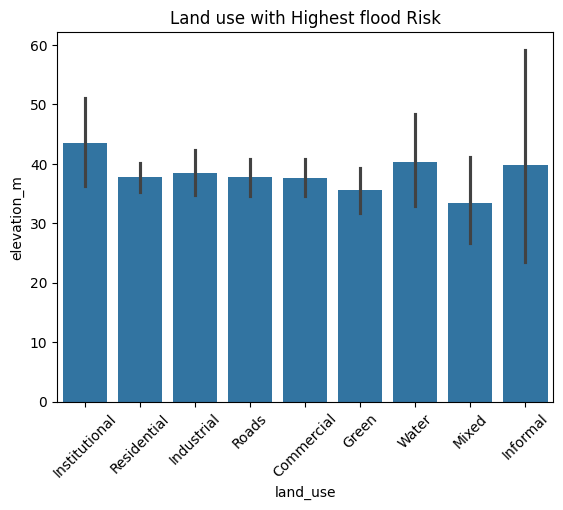

In [238]:
plt.Figure(figsize=(8,4))
sns.barplot(df,x='land_use',y='elevation_m')
plt.xticks(rotation=45)
plt.title("Land use with Highest flood Risk")
plt.show()



3.Are places closer to drains safer compared to those far away?

Which drain type (Open Channel, Manhole, Curb Inlet) is seen more in risky areas?


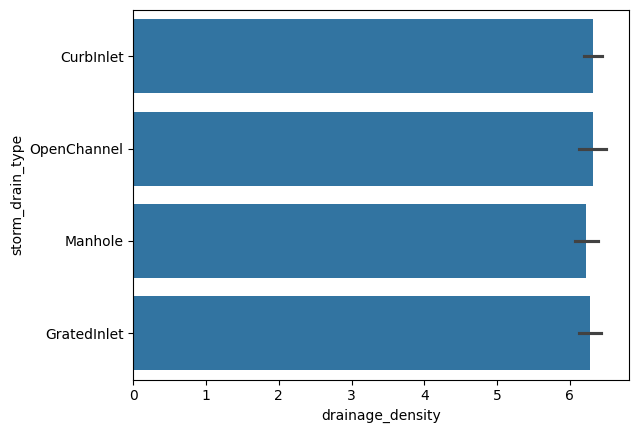

In [250]:
plt.Figure(figsize=(4,2))
sns.barplot(df,x='drainage_density',y='storm_drain_type')
plt.show()